# Imports

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Data

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [20]:
y_train.shape

(50000,)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [21]:
y_test = y_test.reshape(-1,)

In [11]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [12]:
classes[9]

'truck'

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

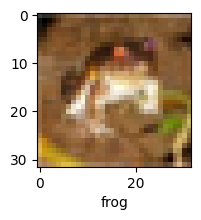

In [14]:
plot_sample(X_train, y_train, 0)

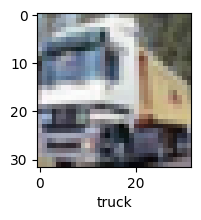

In [15]:
plot_sample(X_train, y_train, 1)

# Prepare Data

In [23]:
X_train = X_train /255
X_test = X_test /255

# Build Artificial Neural Network

In [24]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 89ms/step - accuracy: 0.3038 - loss: 1.9330
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 89ms/step - accuracy: 0.4180 - loss: 1.6491
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.4531 - loss: 1.5542
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 80ms/step - accuracy: 0.4733 - loss: 1.4907
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.4955 - loss: 1.4363


In [25]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.4711 - loss: 1.4894


[1.496660828590393, 0.4657000005245209]

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.41      0.50      1000
           1       0.45      0.74      0.56      1000
           2       0.30      0.55      0.39      1000
           3       0.47      0.14      0.22      1000
           4       0.51      0.21      0.30      1000
           5       0.46      0.28      0.35      1000
           6       0.57      0.47      0.51      1000
           7       0.50      0.59      0.54      1000
           8       0.52      0.70      0.59      1000
           9       0.48      0.57      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



In [28]:
cnn = models.Sequential([

    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.4052 - loss: 1.6480
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6156 - loss: 1.0967
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 43ms/step - accuracy: 0.6717 - loss: 0.9448
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.7056 - loss: 0.8466
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 46ms/step - accuracy: 0.7311 - loss: 0.7682
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7545 - loss: 0.7080
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 36ms/step - accuracy: 0.7765 - loss: 0.6434
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.7911 - loss: 0.6032
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.8081 - loss: 0.5511
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.8229 - loss: 0.5079


In [31]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7046 - loss: 0.9849


[0.9837833046913147, 0.7044000029563904]

In [32]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [34]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


array([[8.0616293e-05, 1.4261786e-04, 4.1869556e-05, 8.9387256e-01,
        9.3232651e-05, 7.9091221e-02, 7.6043711e-04, 1.3958343e-04,
        2.5016364e-02, 7.6148758e-04],
       [1.0502127e-03, 3.1089070e-01, 9.2562223e-06, 3.1621892e-07,
        1.7581602e-08, 1.3478477e-09, 9.6889392e-11, 5.5430888e-10,
        6.8734050e-01, 7.0900714e-04],
       [1.6875267e-01, 6.2606573e-02, 3.1218641e-03, 4.4139437e-03,
        9.3483250e-04, 1.8656673e-04, 3.4129561e-04, 2.0352812e-03,
        7.2114229e-01, 3.6464613e-02],
       [7.0275789e-01, 4.0124869e-04, 3.9397390e-04, 1.6538679e-04,
        1.8198622e-04, 1.7230928e-08, 4.4673561e-06, 9.2374758e-06,
        2.9607463e-01, 1.1078492e-05],
       [8.2239161e-08, 4.3853315e-06, 2.1924267e-03, 6.5372298e-03,
        9.3994236e-01, 1.0326983e-03, 5.0288919e-02, 1.5373217e-06,
        3.5343697e-07, 6.8004073e-09]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [36]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

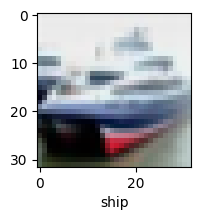

In [37]:
plot_sample(X_test, y_test, 1)

In [38]:
classes[y_classes[1]]

'ship'

In [39]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.77      0.74      1000
           1       0.78      0.85      0.81      1000
           2       0.72      0.52      0.60      1000
           3       0.57      0.39      0.46      1000
           4       0.62      0.69      0.66      1000
           5       0.54      0.71      0.61      1000
           6       0.83      0.73      0.77      1000
           7       0.74      0.76      0.75      1000
           8       0.80      0.81      0.80      1000
           9       0.75      0.82      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

